In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import autograd
from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
DEVICE = "cpu"

print(torch.cuda.is_available())
if torch.cuda.is_available():
    DEVICE = "cuda:0"


True


In [5]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
        , transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

train_dataset = torchvision.datasets.CIFAR10(root='./data'
                                             , train=True
                                             , download=True
                                             , transform=transform)
train_loader = DataLoader(train_dataset
                          , batch_size=4
                          , shuffle=True
                          , num_workers=2)
test_dataset = torchvision.datasets.CIFAR10(root='./data'
                                            , train=False
                                            , download=True
                                            , transform=transform)
test_loader = DataLoader(test_dataset
                         , batch_size=4
                         , shuffle=False
                         , num_workers=2)

14.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

48.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

82.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [33]:
classes = train_dataset.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


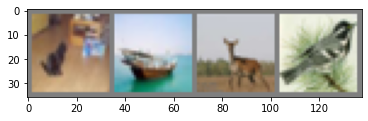

cat	ship	deer	bird	

In [44]:
def imshow(img: torch.Tensor):
    img = img / 2 + 0.5
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

for i in range(len(labels)):
    print(classes[labels[i]], end="\t")

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 24, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(24)
            , nn.ReLU()
            , nn.Conv2d(24, 32, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(32)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
            , nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(64)
            , nn.ReLU()
            , nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
            , nn.BatchNorm2d(64)
            , nn.ReLU()
            , nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5)
            , nn.Linear()
        )

    def forward(self, x):
        return x
